# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

c:\installed-software\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\installed-software\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\installed-software\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\installed-software\python\python36\lib\site-packages\tensorflow\

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

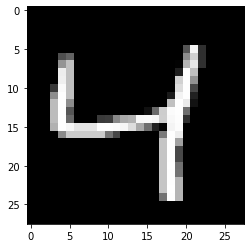

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6948
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6877
Epoch: 1/20... Training loss: 0.6837
Epoch: 1/20... Training loss: 0.6791
Epoch: 1/20... Training loss: 0.6730
Epoch: 1/20... Training loss: 0.6655
Epoch: 1/20... Training loss: 0.6575
Epoch: 1/20... Training loss: 0.6470
Epoch: 1/20... Training loss: 0.6362
Epoch: 1/20... Training loss: 0.6224
Epoch: 1/20... Training loss: 0.6091
Epoch: 1/20... Training loss: 0.5921
Epoch: 1/20... Training loss: 0.5776
Epoch: 1/20... Training loss: 0.5588
Epoch: 1/20... Training loss: 0.5400
Epoch: 1/20... Training loss: 0.5213
Epoch: 1/20... Training loss: 0.5045
Epoch: 1/20... Training loss: 0.4874
Epoch: 1/20... Training loss: 0.4668
Epoch: 1/20... Training loss: 0.4482
Epoch: 1/20... Training loss: 0.4256
Epoch: 1/20... Training loss: 0.4132
Epoch: 1/20... Training loss: 0.3982
Epoch: 1/20... Training loss: 0.3884
Epoch: 1/20... Training loss: 0.3758
Epoch: 1/20... Training loss: 0.3632
E

Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1991
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1807
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1911
E

Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1619
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1569
E

Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1436
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1340
E

Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1226
E

Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1106
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1105
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1140
E

Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1048
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1039
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1089
E

Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1018
E

Epoch: 7/20... Training loss: 0.1057
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0961
Epoch: 7/20... Training loss: 0.1071
Epoch: 7/20... Training loss: 0.1051
E

Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1042
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1000
E

Epoch: 8/20... Training loss: 0.0926
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0991
E

Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0962
E

Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0897
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0984
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0879
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0878
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0976
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

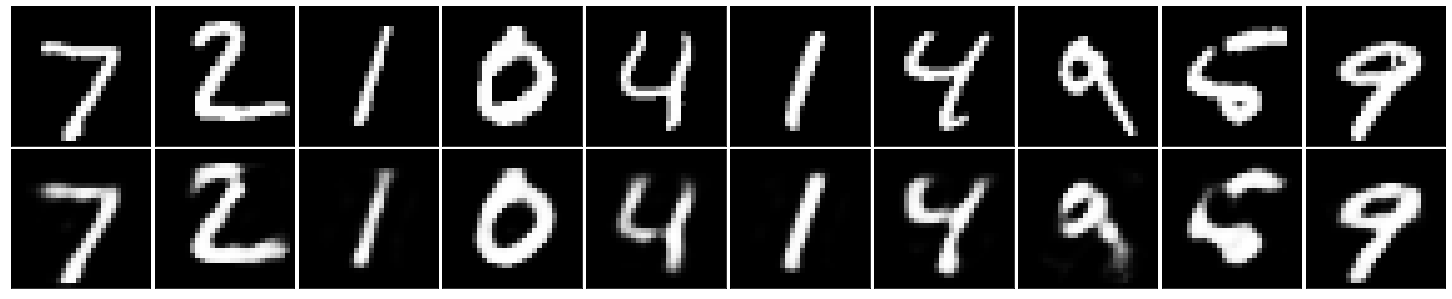

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs, targets_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.